<a href="https://colab.research.google.com/github/linggaajiandika/MLComplate/blob/main/Machine_Learning_Supervised_%26_Unsupervised_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Package & Data

In [ ]:
# Import package
import pandas as pd # data manipulation and analysis
import numpy as np #fungsi matematika yang komprehensif
import matplotlib.pyplot as plt # membuat plot
import seaborn as sns # opsi lain untuk plot
from scipy import stats 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
pd.set_option('display.float_format', lambda x: '%.2f' % x) # set 2 angka dibelakang koma (desimal)

Data Source: 
1. covid : kawalcovid19 https://datawrapper.dwcdn.net/MwHOx/581/
2. iris :  UCI Machine Learning https://archive.ics.uci.edu/ml/datasets/iris

In [ ]:
# Import data covid kabupaten kota ('data.csv')
df = pd.read_csv('/content/data.csv')

# Import data iris
df1 = pd.read_csv('/content/iris.csv')

In [ ]:
# menampilkan data teratas untuk data covid
df.head()

,X.1,Provinsi,Kabupaten/Kota,X.2,IKK,OTG Total,ODP Total,ODP Proses,PDP Total,PDP Proses,PDP MD,SUS T,SUS S,SUS MD,PROB T,PROB S,PROB MD,POS T,POS P,POS S,POS MD,POS IM,Tanggal Update,X.3,Luas Wilayah,Jumlah Penduduk,Penduduk/sq.km,Resolved,RI,"CFR (inc ODP, PDP,SUS,PROB)",Kematian Total per 100.000 Penduduk,Rasio Lacak Isolasi (RLI),Kasus Total per 100rb penduduk,Kasus selesai per 100rb penduduk,Kasus total (inc PDP) per 100rb penduduk,Kasus selesai (inc PDP) per 100rb penduduk,Total,Resolved1,Trace,X.4,IKK1,IKK2,IKK3,Kasus Aktif per 100.000 penduduk,X.5,X.6
0,1107,Aceh,Aceh Barat,Aceh Barat (ABAR),8.23,nan,nan,nan,nan,nan,nan,228.00,228.00,0.00,43.00,41.00,2.00,1055.00,305.00,693.00,57.00,nan,Tanggal,9/18/2021,2928.00,189119.00,65.00,71.06,65.69,5.37,31.20,0.26,557.85,396.58,580.59,419.31,55.85,14.48,0.12,0.20,1.89,6.35,8.23,161.27,Asumsi PDP &gt; Pos,35.00
1,1112,Aceh,Aceh Barat Daya,Aceh Barat Daya (ABDYA),6.96,nan,nan,nan,nan,nan,nan,202.00,202.00,0.00,51.00,45.00,4.00,374.00,37.00,309.00,28.00,nan,Tanggal,9/18/2021,1491.00,148687.00,100.00,90.15,82.62,7.53,21.52,0.68,251.54,226.65,285.84,259.61,46.39,11.39,0.12,0.19,1.22,5.75,6.96,24.88,Asumsi Suspect &gt; Pos,30.00
2,1108,Aceh,Aceh Besar,Aceh Besar (ABES),11.41,nan,nan,nan,nan,nan,nan,183.00,183.00,0.00,25.00,24.00,1.00,5614.00,854.00,4501.00,259.00,nan,Tanggal,9/18/2021,2969.00,384661.00,130.00,84.79,80.17,4.61,67.59,0.04,1459.47,1237.45,1465.97,1243.95,82.21,24.94,0.13,0.21,3.63,7.78,11.41,222.01,Asumsi Tracing (exp),3.00
3,1116,Aceh,Aceh Jaya,Aceh Jaya (AJAY),7.40,nan,nan,nan,nan,nan,nan,182.00,182.00,0.00,2.00,2.00,0.00,468.00,56.00,388.00,24.00,nan,Tanggal,9/18/2021,3813.00,86058.00,23.00,88.01,82.91,5.11,27.89,0.39,543.82,478.75,546.14,481.07,52.81,15.51,0.17,0.28,1.02,6.39,7.40,65.07,Asumsi Tracing (used),5.00
4,1103,Aceh,Aceh Selatan,Aceh Selatan (ASEL),8.95,nan,nan,nan,nan,nan,nan,277.00,273.00,0.00,9.00,2.00,7.00,884.00,126.00,688.00,70.00,nan,Tanggal,9/18/2021,3842.00,230254.00,60.00,86.45,77.83,8.62,33.44,0.32,383.92,329.20,387.83,333.11,57.83,12.91,0.12,0.19,1.83,7.12,8.95,54.72,NaN,nan


In [ ]:
df1.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


*Note: untuk preprocessing data menggunakan dataset covid karena belum bersih, untuk modeling menggunakan dataset iris karena sudah cleann

# 2. Preprocessing data

In [ ]:
df.info() # Mencari informasi dari dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 46 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X.1                                         518 non-null    int64  
 1   Provinsi                                    510 non-null    object 
 2   Kabupaten/Kota                              518 non-null    object 
 3   X.2                                         492 non-null    object 
 4   IKK                                         510 non-null    float64
 5   OTG Total                                   194 non-null    float64
 6   ODP Total                                   170 non-null    float64
 7   ODP Proses                                  166 non-null    float64
 8   PDP Total                                   145 non-null    float64
 9   PDP Proses                                  165 non-null    float64
 10  PDP MD        

## 2.1 Selecting Column

In [ ]:
# slicing dataset (memilih kolom yang diinginkan)
df_slice = df[['X.1','Provinsi', 'Kabupaten/Kota','POS T','POS P',
       'POS S', 'POS MD', 'Luas Wilayah',
       'Jumlah Penduduk', 'Penduduk/sq.km', 'X.3']]
df_slice.shape

(518, 11)

In [ ]:
df_slice.head()

,X.1,Provinsi,Kabupaten/Kota,POS T,POS P,POS S,POS MD,Luas Wilayah,Jumlah Penduduk,Penduduk/sq.km,X.3
0,1107,Aceh,Aceh Barat,1055.00,305.00,693.00,57.00,2928.00,189119.00,65.00,9/18/2021
1,1112,Aceh,Aceh Barat Daya,374.00,37.00,309.00,28.00,1491.00,148687.00,100.00,9/18/2021
2,1108,Aceh,Aceh Besar,5614.00,854.00,4501.00,259.00,2969.00,384661.00,130.00,9/18/2021
3,1116,Aceh,Aceh Jaya,468.00,56.00,388.00,24.00,3813.00,86058.00,23.00,9/18/2021
4,1103,Aceh,Aceh Selatan,884.00,126.00,688.00,70.00,3842.00,230254.00,60.00,9/18/2021


In [ ]:
df_slice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X.1              518 non-null    int64  
 1   Provinsi         510 non-null    object 
 2   Kabupaten/Kota   518 non-null    object 
 3   POS T            510 non-null    float64
 4   POS P            510 non-null    float64
 5   POS S            510 non-null    float64
 6   POS MD           510 non-null    float64
 7   Luas Wilayah     510 non-null    float64
 8   Jumlah Penduduk  510 non-null    float64
 9   Penduduk/sq.km   510 non-null    float64
 10  X.3              510 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


## 2.2 Handling Missing value

1. drop NaN (menghapus missing value karena tidak digunakan) `df.dropna()`

2. Fill NaN (mengisi missing value karena data digunakan) `df.fillna(df.mean())`

3. Fill NaN dengan interpolasi (baik untuk data continuous) ex: Time series data `df.interpolate(method="polynomial", order=2)`



In [ ]:
null_data = df_slice[df_slice.isnull().any(axis=1)]
null_data

,X.1,Provinsi,Kabupaten/Kota,POS T,POS P,POS S,POS MD,Luas Wilayah,Jumlah Penduduk,Penduduk/sq.km,X.3
510,1888,NaN,Danau – Lampung,nan,nan,nan,nan,nan,nan,nan,NaN
511,1388,NaN,Danau – Sumatera Barat,nan,nan,nan,nan,nan,nan,nan,NaN
512,1688,NaN,Danau – Sumatera Selatan,nan,nan,nan,nan,nan,nan,nan,NaN
513,7188,NaN,Danau – Sumatera Utara,nan,nan,nan,nan,nan,nan,nan,NaN
514,3399,NaN,Danau Toba,nan,nan,nan,nan,nan,nan,nan,NaN
515,3288,NaN,Hutan,nan,nan,nan,nan,nan,nan,nan,NaN
516,3388,NaN,Waduk Cira,nan,nan,nan,nan,nan,nan,nan,NaN
517,1288,NaN,Waduk Kedu,nan,nan,nan,nan,nan,nan,nan,NaN


In [ ]:
df_drop = df_slice.dropna()
df_drop.shape

(510, 11)

##  2.3 Filtering Raw

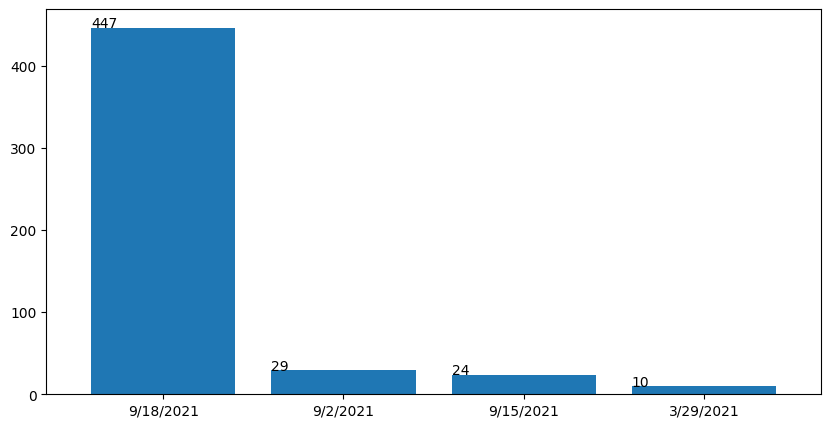

In [ ]:
# Cek tanggal update
ax=df_drop['X.3'].value_counts().sort_values(ascending=False)[:10].plot(figsize=(10,5),kind='bar', rot=0, width=0.8)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()))

In [ ]:
#tampilkan data selain tanggal 09/18/2021
df_drop[df_drop["X.3"]!="9/18/2021"]

,X.1,Provinsi,Kabupaten/Kota,POS T,POS P,POS S,POS MD,Luas Wilayah,Jumlah Penduduk,Penduduk/sq.km,X.3
269,8201,Maluku Utara,Halmahera Barat,136.00,9.00,115.00,12.00,1704.00,110528.00,65.00,3/29/2021
270,8204,Maluku Utara,Halmahera Selatan,630.00,255.00,365.00,10.00,8149.00,219559.00,27.00,3/29/2021
271,8202,Maluku Utara,Halmahera Tengah,28.00,1.00,25.00,2.00,2653.00,49698.00,19.00,3/29/2021
272,8206,Maluku Utara,Halmahera Timur,200.00,5.00,186.00,9.00,6571.00,84970.00,13.00,3/29/2021
273,8205,Maluku Utara,Halmahera Utara,782.00,206.00,552.00,24.00,3897.00,179783.00,46.00,3/29/2021
...,...,...,...,...,...,...,...,...,...,...,...
390,7312,Sulawesi Selatan,Soppeng,2356.00,42.00,2250.00,64.00,1359.00,226057.00,166.00,9/15/2021
391,7305,Sulawesi Selatan,Takalar,2265.00,80.00,2134.00,51.00,567.00,286596.00,506.00,9/15/2021
392,7318,Sulawesi Selatan,Tana Toraja,3343.00,525.00,2804.00,14.00,2054.00,228778.00,111.00,9/15/2021
393,7326,Sulawesi Selatan,Toraja Utara,1156.00,79.00,1070.00,7.00,1151.00,225362.00,196.00,9/15/2021


In [ ]:
ax

In [ ]:
#filter untuk tangga 09/18/2021
df_filter = df_drop[df_drop["X.3"]=="9/18/2021"]
df_filter.shape

(447, 11)

## 2.4 Rename Column

note: memudahkan proses selanjutnya

In [ ]:
df_rename= df_filter.rename({'X.1': 'kode', 'Provinsi' : 'provinsi', 'Kabupaten/Kota' : 'kabkot','POS T' : 'total','POS P' : 'dirawat',
       'POS S': 'sembuh', 'POS MD' : 'meninggal', 'Luas Wilayah' : 'luas_wilayah',
       'Jumlah Penduduk' : 'jml_penduduk', 'Penduduk/sq.km' :'kepadatan', 'X.3':'tanggal'}, axis=1)
df_rename.head()

,kode,provinsi,kabkot,total,dirawat,sembuh,meninggal,luas_wilayah,jml_penduduk,kepadatan,tanggal
0,1107,Aceh,Aceh Barat,1055.00,305.00,693.00,57.00,2928.00,189119.00,65.00,9/18/2021
1,1112,Aceh,Aceh Barat Daya,374.00,37.00,309.00,28.00,1491.00,148687.00,100.00,9/18/2021
2,1108,Aceh,Aceh Besar,5614.00,854.00,4501.00,259.00,2969.00,384661.00,130.00,9/18/2021
3,1116,Aceh,Aceh Jaya,468.00,56.00,388.00,24.00,3813.00,86058.00,23.00,9/18/2021
4,1103,Aceh,Aceh Selatan,884.00,126.00,688.00,70.00,3842.00,230254.00,60.00,9/18/2021


## 2.5 Statistik Deskriptif

In [ ]:
#sort data berdasarkan nilainya
df_rename.sort_values(by=['total'])

,kode,provinsi,kabkot,total,dirawat,sembuh,meninggal,luas_wilayah,jml_penduduk,kepadatan,tanggal
342,9112,Papua Barat,Manokwari,3.00,0.00,3.00,0.00,2774.00,28218.00,10.00,9/18/2021
345,9110,Papua Barat,Maybrat,15.00,0.00,10.00,5.00,5462.00,37392.00,7.00,9/18/2021
267,8107,Maluku,Seram Bagian Timur,54.00,6.00,48.00,0.00,5799.00,108240.00,19.00,9/18/2021
350,9109,Papua Barat,Tambrauw,72.00,3.00,66.00,3.00,5180.00,13515.00,3.00,9/18/2021
266,8106,Maluku,Seram Bagian Barat,78.00,7.00,63.00,8.00,6948.00,169481.00,24.00,9/18/2021
...,...,...,...,...,...,...,...,...,...,...,...
86,3276,Jawa Barat,Depok,104586.00,1279.00,101210.00,2097.00,200.00,1809120.00,9033.00,9/18/2021
61,3101,Jakarta Raya,Kepulauan Seribu,110802.00,290.00,108957.00,945.00,9.00,23340.00,2683.00,9/18/2021
59,3172,Jakarta Raya,Jakarta Timur,126778.00,133.00,124353.00,2067.00,188.00,2843816.00,15124.00,9/18/2021
57,3173,Jakarta Raya,Jakarta Pusat,211245.00,187.00,207263.00,3382.00,48.00,914182.00,18994.00,9/18/2021


In [ ]:
#lihat statistik deskriptif nya
df_stats=df_rename[['total','dirawat','sembuh','meninggal','kepadatan']]
df_stats.describe()

,total,dirawat,sembuh,meninggal,kepadatan
count,447.00,447.00,447.00,447.00,447.00
mean,9302.25,173.66,8787.18,345.21,1201.88
std,21258.23,550.38,20716.65,584.15,2736.20
min,3.00,-2626.00,3.00,0.00,1.00
25%,1313.50,21.00,1167.00,41.00,59.50
50%,3237.00,65.00,2996.00,128.00,171.00
75%,9179.50,157.50,8783.00,386.00,934.50
max,259033.00,8639.00,253905.00,6474.00,19018.00


## 2.6 Handling Outlier

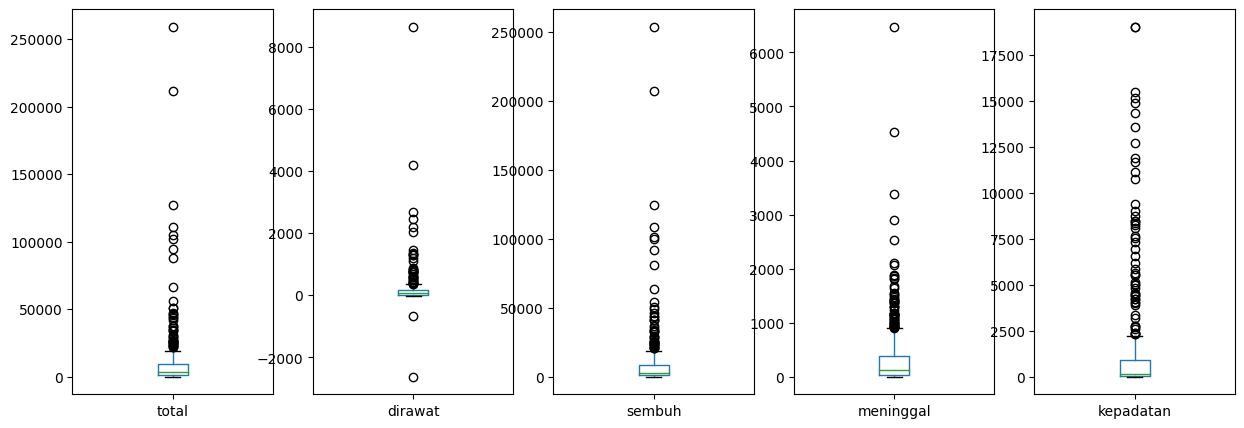

In [ ]:
df_stats.plot(kind='box',subplots=True,layout=(1,5),sharex=False, figsize=(15,5))
plt.show()

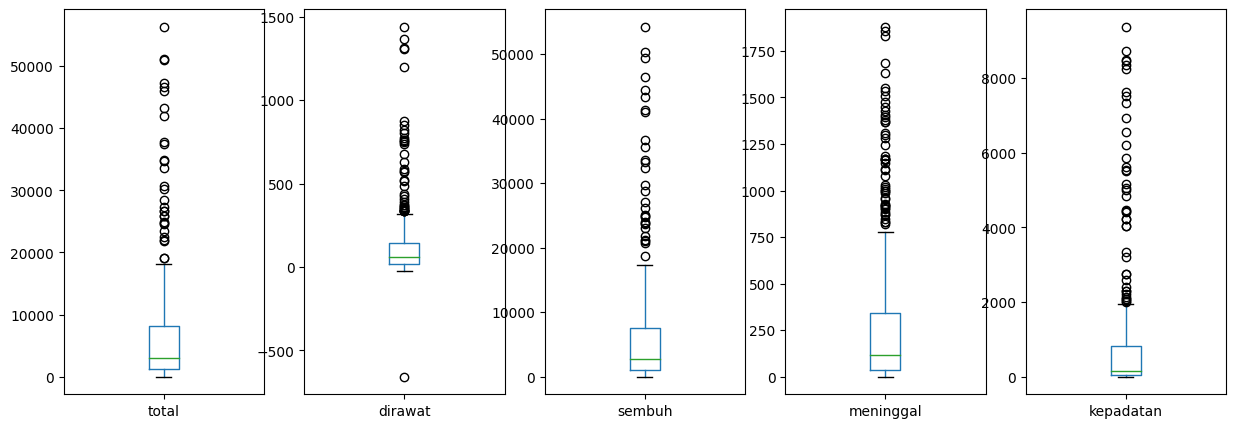

In [ ]:
df_zscore=df_stats[(np.abs(stats.zscore(df_stats)) < 3).all(axis=1)]
df_zscore.plot(kind='box',subplots=True,layout=(1,5),sharex=False, figsize=(15,5))
plt.show()

In [ ]:
df_zscore.shape

(425, 5)

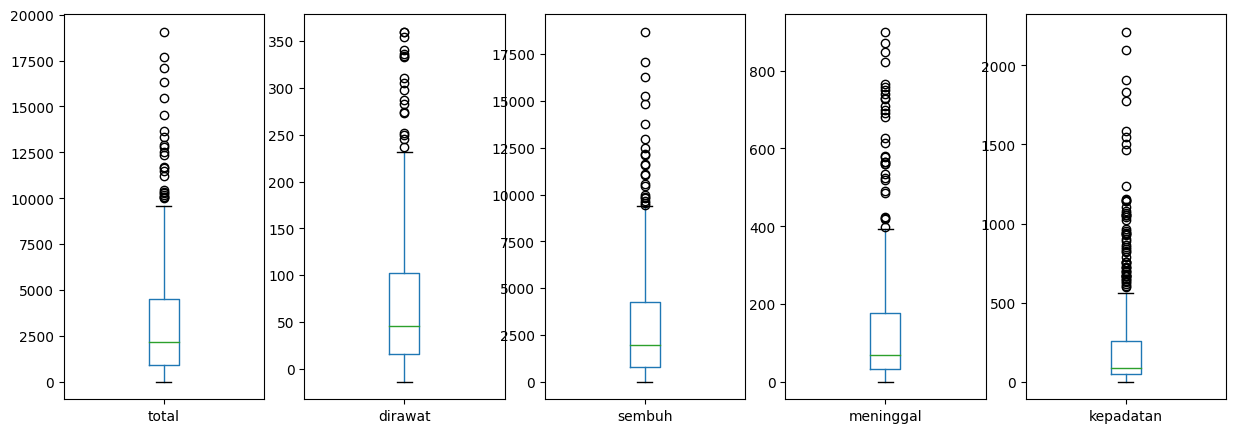

In [ ]:
#find Q1, Q3, and interquartile range for each column
Q1 = df_stats.quantile(q=.25)
Q3 = df_stats.quantile(q=.75)
IQR = df_stats.apply(stats.iqr) #IQR=Q3-Q1

#keep nilai antara 1.5*IQR dari Q1 dan Q3
df_iqr = df_stats[~((df_stats < (Q1-1.5*IQR)) | (df_stats > (Q3+1.5*IQR))).any(axis=1)]
df_iqr.plot(kind='box',subplots=True,layout=(1,5),sharex=False, figsize=(15,5))
plt.show()

In [ ]:
df_iqr.shape

(324, 5)

## 2.7 Handling Non Normal Distribution

Note: not mandatory / u can ignoring in some cases

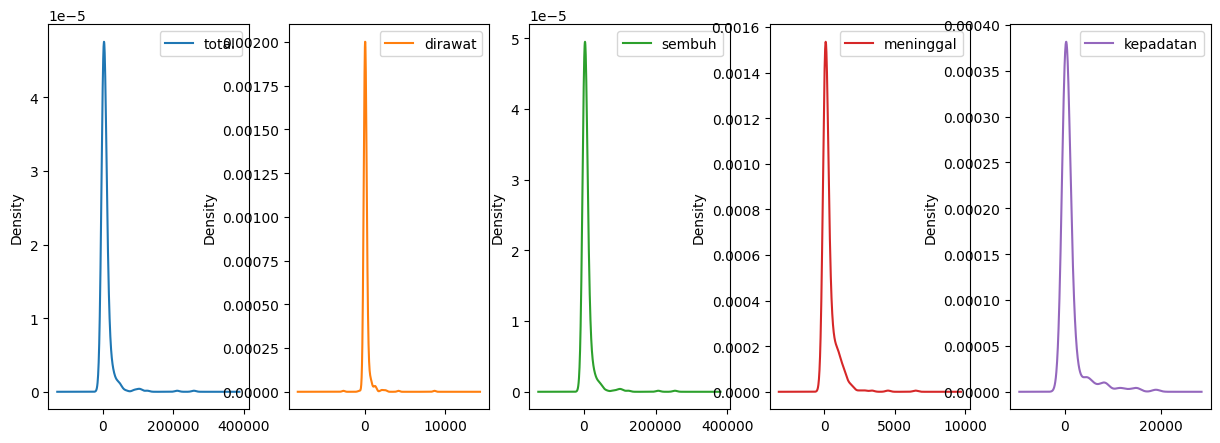

In [ ]:
df_stats.plot(kind='density',subplots=True,layout=(1,5),sharex=False, figsize=(15,5))
plt.show()

In [ ]:
total = df_stats['total'].values

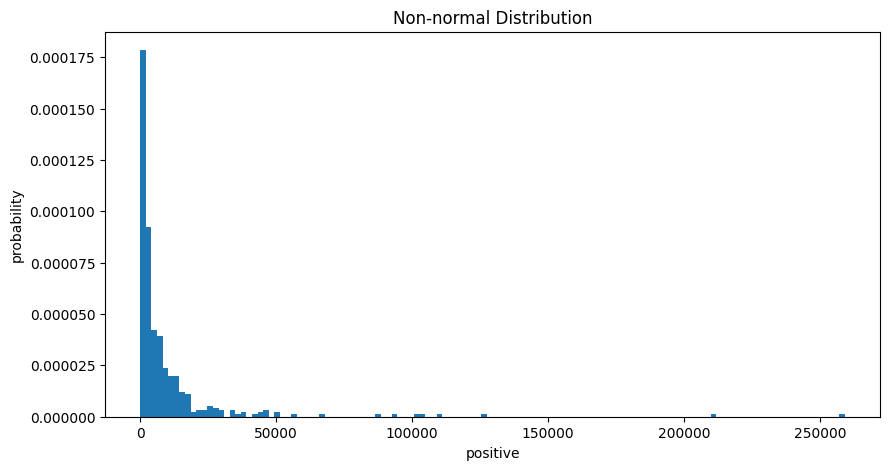

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(total, bins='auto', density=True)
ax.set_xlabel('positive')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution');

In [ ]:
trans, lmbda = stats.boxcox(total)

Best lambda parameter = 0.049


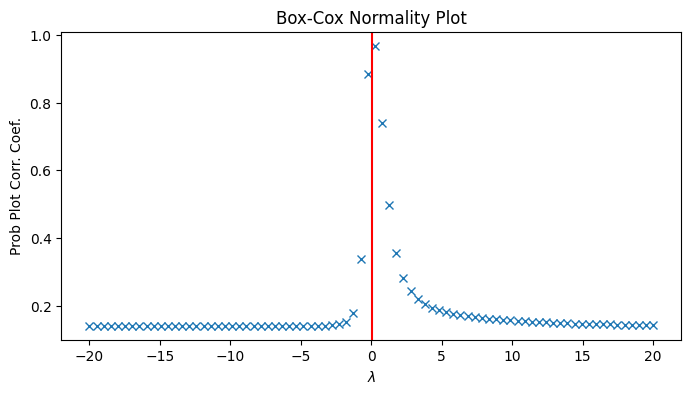

In [ ]:
print('Best lambda parameter = %s' % round(lmbda, 3))

fig, ax = plt.subplots(figsize=(8, 4))
prob = stats.boxcox_normplot(total, -20, 20, plot=ax)
ax.axvline(lmbda, color='r');

In [ ]:
trans.sort()
mean, std = stats.norm.fit(trans, loc=0)
pdf_norm = stats.norm.pdf(trans, mean, std)

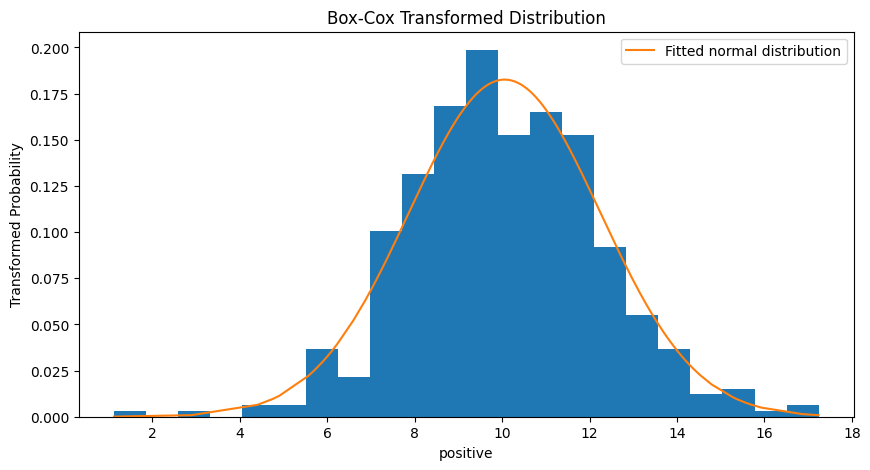

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(trans, bins='auto', density=True)
ax.plot(trans, pdf_norm, label='Fitted normal distribution')
ax.set_xlabel('positive')
ax.set_ylabel('Transformed Probability')
ax.set_title('Box-Cox Transformed Distribution')
ax.legend();

## 2.8 Korelasi

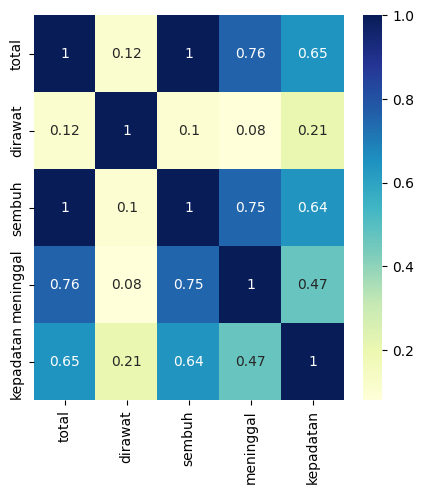

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(df_stats.corr(), annot=True,cmap="YlGnBu")

# 3. Modeling

## 3.1 Unspervised 

In [ ]:
X = df_stats[['total','kepadatan']]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

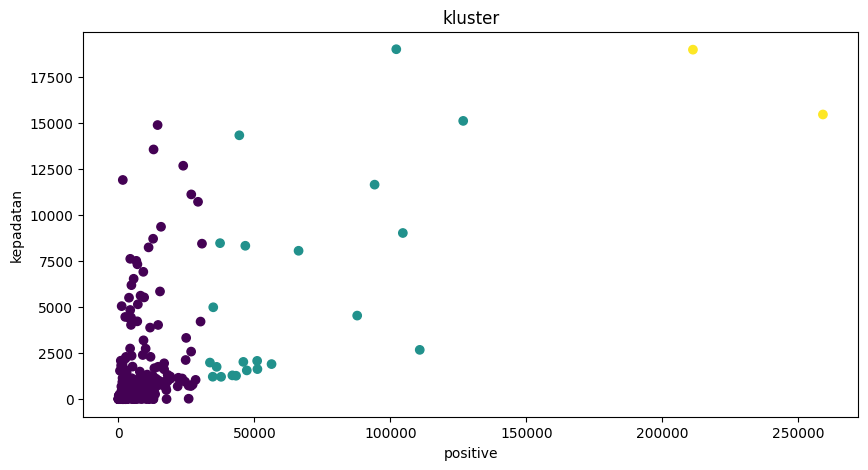

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X['total'], X['kepadatan'], c=kmeans.labels_)
ax.set_xlabel('positive')
ax.set_ylabel('kepadatan')
ax.set_title('kluster');

### 3.1.1. kluster terbaik

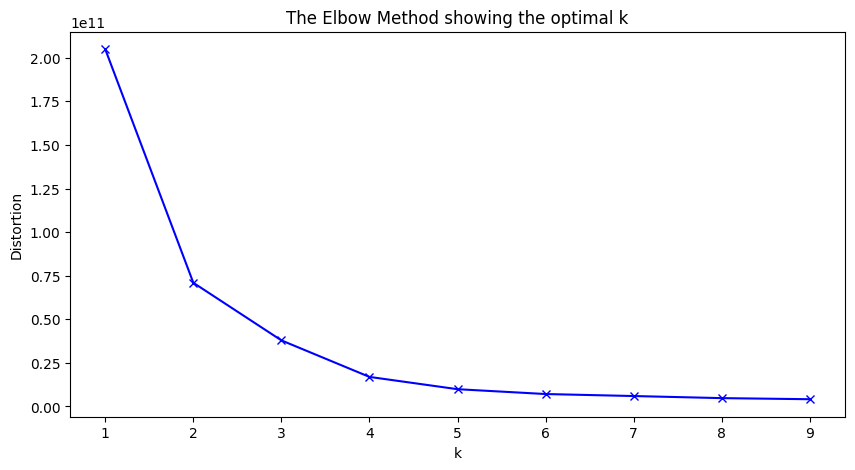

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

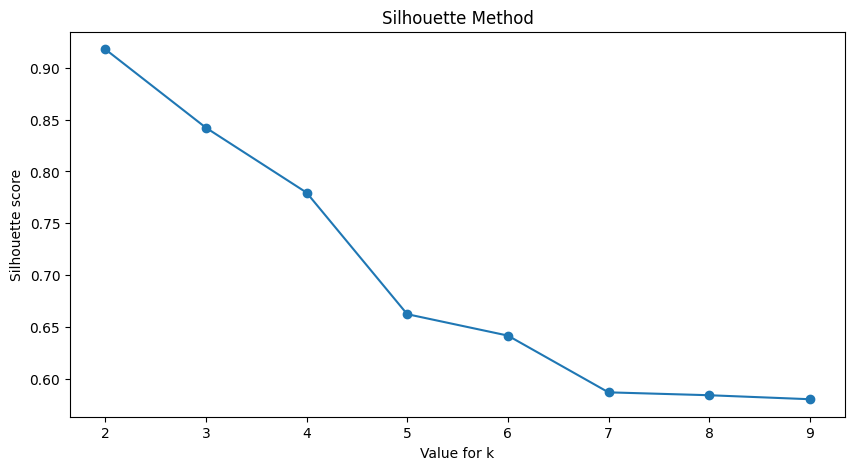

In [ ]:
k = range(2,10)
score=[]
for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    score.append(silhouette_score(X,kmeans.labels_))
plt.figure(figsize=(10,5))
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

## 3.2 supervised

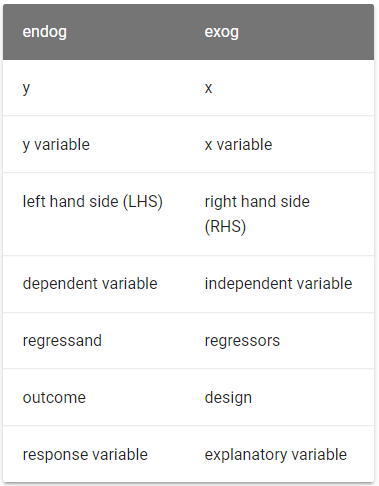

In [ ]:
df1.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.10,3.50,1.40,0.20,Iris-setosa
1,4.90,3.00,1.40,0.20,Iris-setosa
2,4.70,3.20,1.30,0.20,Iris-setosa
3,4.60,3.10,1.50,0.20,Iris-setosa
4,5.00,3.60,1.40,0.20,Iris-setosa


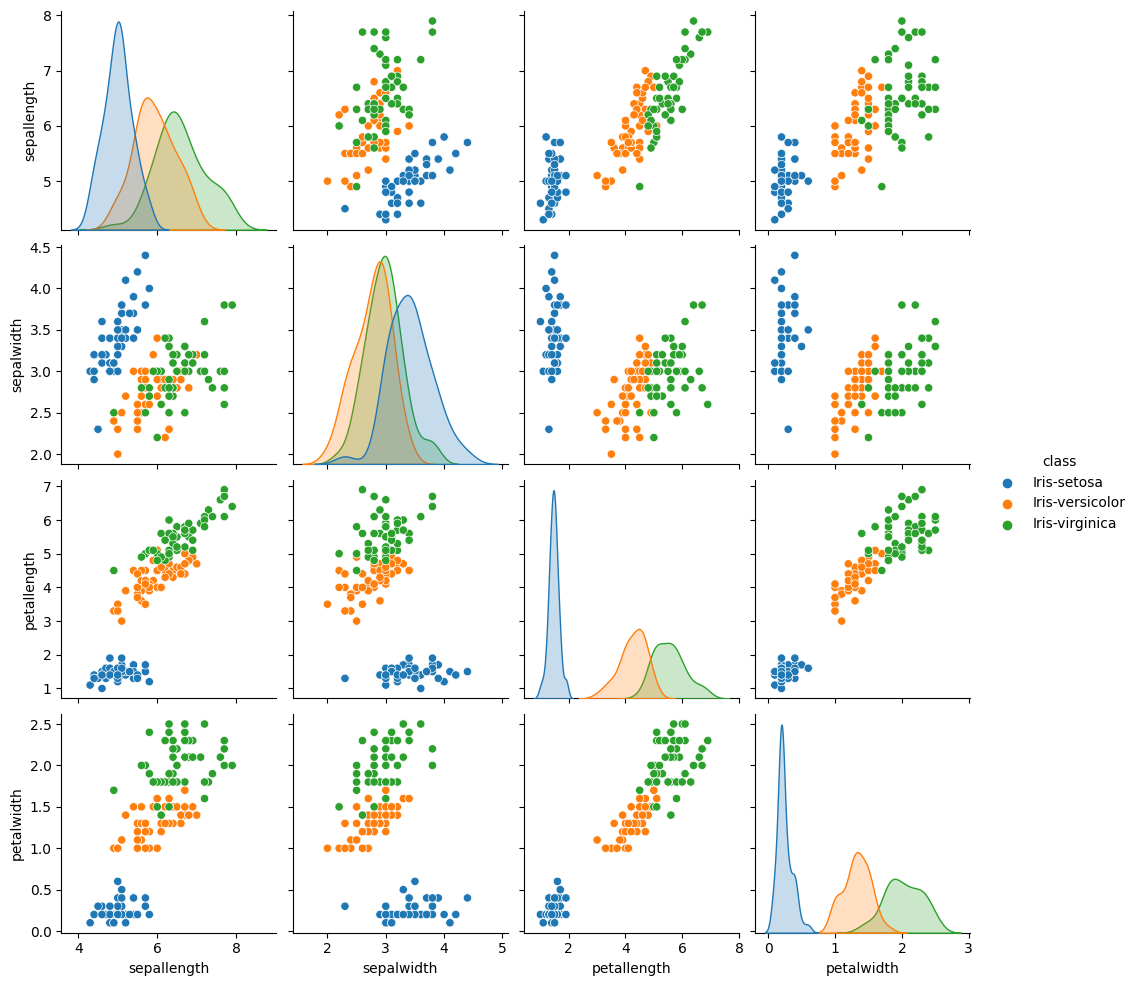

In [ ]:
sns.pairplot(df1, hue="class",palette='tab10')

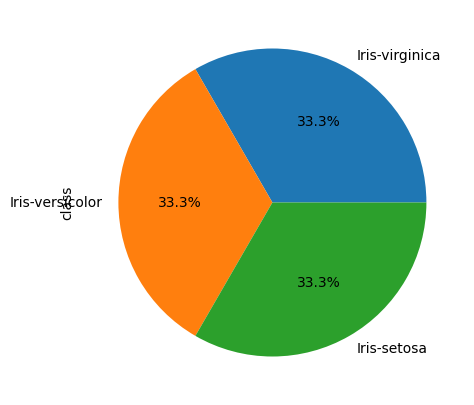

In [ ]:
df1['class'].value_counts().plot(figsize=(5,5),kind='pie', autopct = "%.1f%%")

In [ ]:
# memisahkan X dan y
X = df1.drop(['class'], axis=1)
#Encoding class
y=pd.factorize(df1['class'])[0]
y=pd.DataFrame(y,columns=['class'])

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

### 3.2.1 Decision Tree


In [ ]:
dtree1 = DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy'], 'max_depth' : [1,6,10]}
dtree = GridSearchCV(dtree1, parameters,cv=10)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [ ]:
print("Prediksi kelas: ", y_pred)
print("Best Parameter: ", dtree.best_params_)
print("Train set Accuracy: ", accuracy_score(y_train, dtree.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

Prediksi kelas:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Best Parameter:  {'criterion': 'gini', 'max_depth': 6}
Train set Accuracy:  1.0
Test set Accuracy:  0.9777777777777777


In [ ]:
from sklearn.externals import joblib

# save best model to current working directory
joblib.dump(dtree, "modeldtree.pkl")
# load from file and predict using the best configs found in the CV step
model_tree = joblib.load("/content/modeldtree.pkl" )

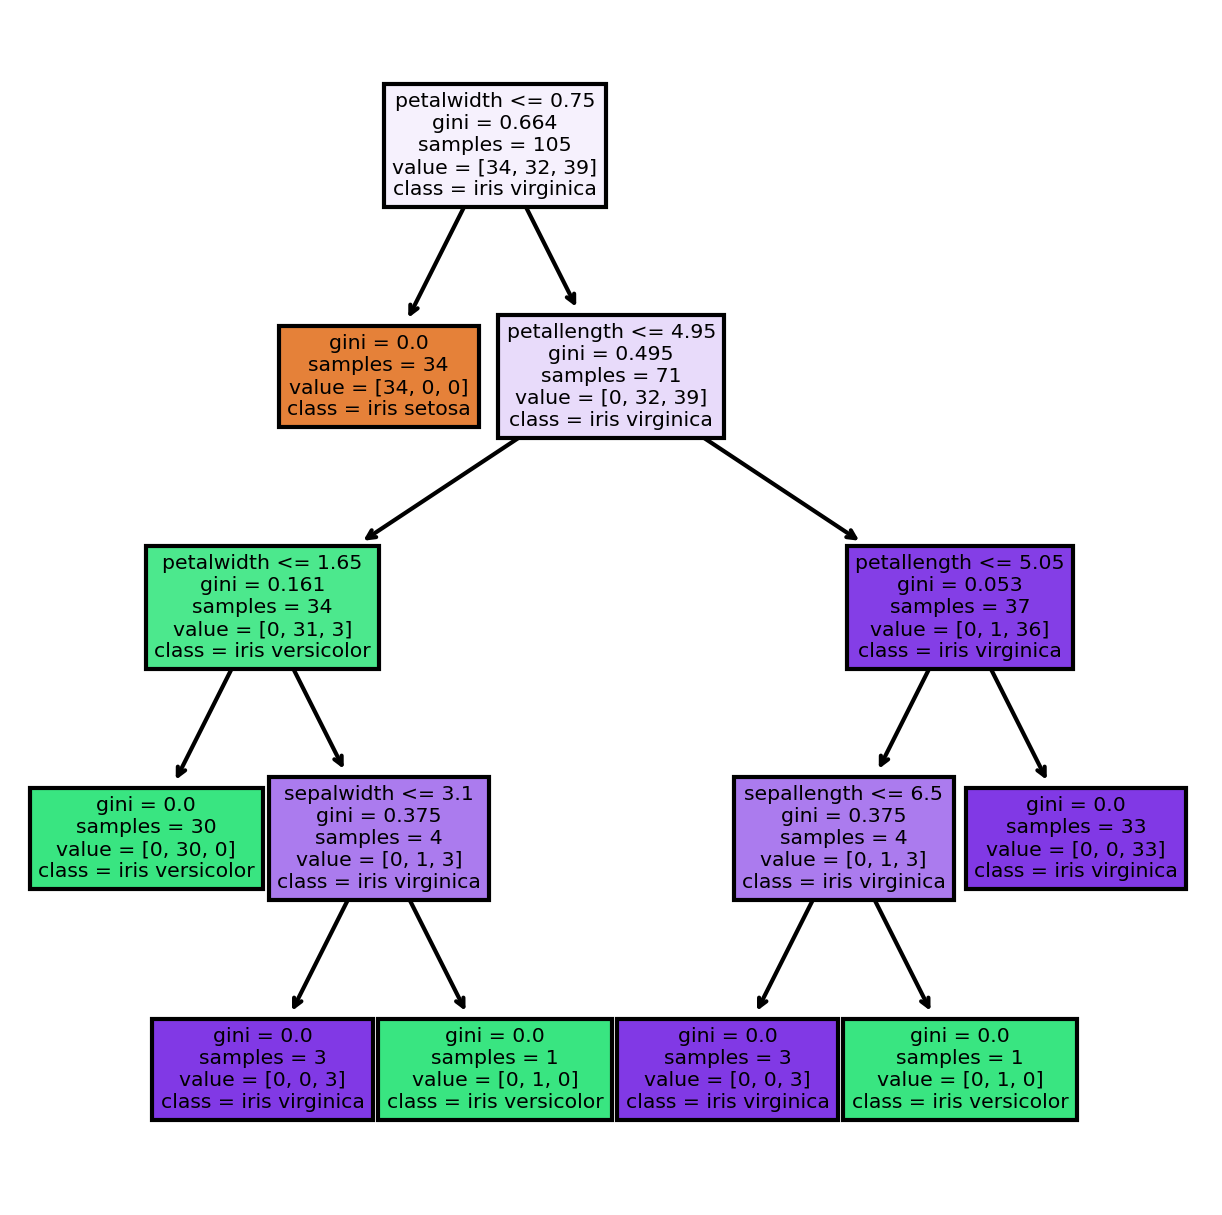

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
names=list(X.columns)
tn= ['iris setosa', 'iris versicolor', 'iris virginica']
tree.plot_tree(dtree.best_estimator_,
                     feature_names = names, 
                     class_names=tn,
                     filled = True)
fig.savefig('tree.png')

### 3.2.2 kNN

In [ ]:
clf1 = KNeighborsClassifier()
parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree']}
clf = GridSearchCV(clf1, parameters,cv=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

In [ ]:
print("Prediksi kelas: ", y_pred)
print("Best Parameter: ", clf.best_params_)
print("Train set Accuracy: ", accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

Prediksi kelas:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]
Best Parameter:  {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'uniform'}
Train set Accuracy:  0.9619047619047619
Test set Accuracy:  0.9777777777777777


# 4. Evaluating Model

In [ ]:
print(classification_report(y_test, y_pred, target_names=tn))

                 precision    recall  f1-score   support

    iris setosa       1.00      1.00      1.00        16
iris versicolor       1.00      0.94      0.97        18
 iris virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



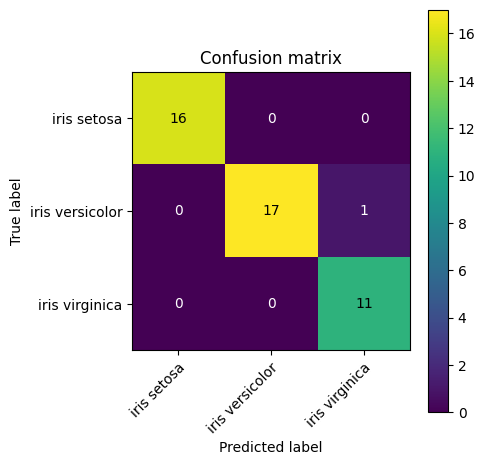

In [ ]:
# Confusion Matrix
plt.style.use('default')
def plot_confusion_matrix(y_test, y_pred, classes,
                          title=None,
                          cmap=plt.cm.viridis):

    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="black" if cm[i, j] > thresh else "white")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, y_pred, classes=tn,
                      title='Confusion matrix')

plt.show()

# Thanks 
Feel free to contact me:


*   Email: linggaajiandika@gmail.com
*   Phone: +6281223228410
*   linkedIn: https://www.linkedin.com/in/linggaajiandika/
*   Github: Lingga Aji Andika / linggaajiandika.github.io
*   instagram: @linggaajiandika
*   YT: Lingga Aji Andika


dan jangan lupa gabung Data Science Indonesia 😁  http://datascience.or.id/



